Loading Packages
Importing Omega_k!=0 package
Running Cosmo Check
NOTE: This cosmology still needs fixing - doesn't work for large values of Ode, but need to check if these are physical values anyway
complexity 0 cosmo_iter 0


/mnt/users/hollowayp/zBEAMS/vs_code_python114_archive_zBEAMS/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)
/mnt/users/hollowayp/zBEAMS/vs_code_python114_archive_zBEAMS/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)


complexity 0 cosmo_iter 1
complexity 0 cosmo_iter 2
complexity 1 cosmo_iter 0
complexity 1 cosmo_iter 1
complexity 1 cosmo_iter 2
complexity 2 cosmo_iter 0
Failed Check: 
Cosmology: w0waCDM(H0=50.0 km / (Mpc s), Om0=0.20000000298023224, Ode0=1.7000000476837158, w0=-0.5, wa=-0.8999999761581421, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)


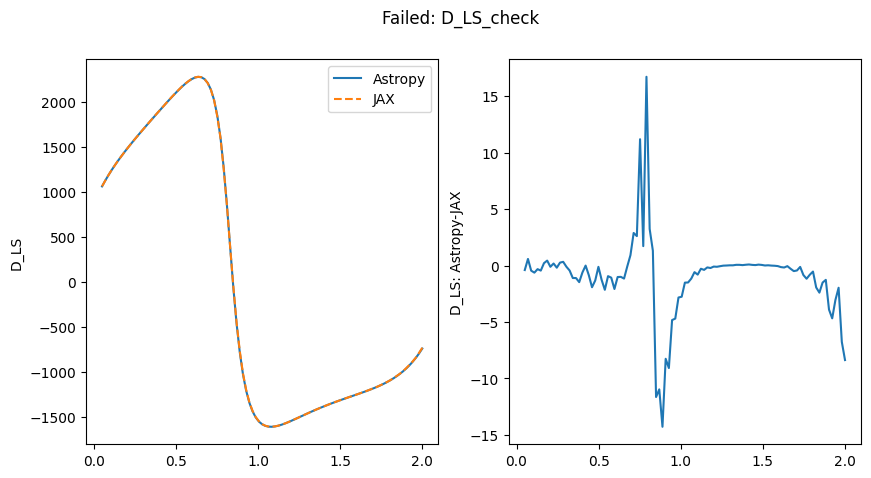

Failed Check (2) 
Cosmology: w0waCDM(H0=50.0 km / (Mpc s), Om0=0.20000000298023224, Ode0=1.7000000476837158, w0=-0.5, wa=-0.8999999761581421, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)


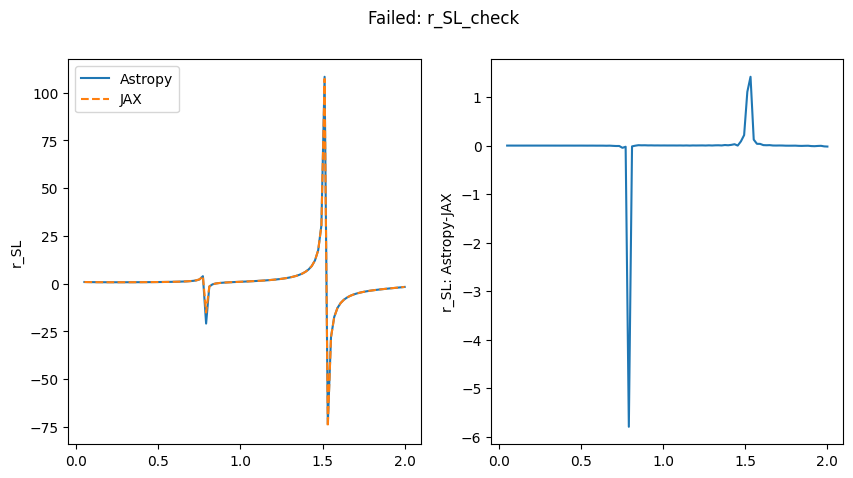

complexity 2 cosmo_iter 1
complexity 2 cosmo_iter 2
Importing Omega_k==0 package
Running Cosmo Check
NOTE: This cosmology still needs fixing - doesn't work for large values of Ode, but need to check if these are physical values anyway
complexity 0 cosmo_iter 0
complexity 0 cosmo_iter 1
complexity 0 cosmo_iter 2
complexity 1 cosmo_iter 0
complexity 1 cosmo_iter 1
complexity 1 cosmo_iter 2
complexity 2 cosmo_iter 0
complexity 2 cosmo_iter 1
complexity 2 cosmo_iter 2
Running Omega_k check


 69%|██████▉   | 162/234 [00:00<00:00, 1289330.64it/s]


Saving notebook backup to ./code_backups/zBEAMS_Application_to_Strong_Lensing_3028_1724593235.8911.py
['/mnt/users/hollowayp/zBEAMS/vs_code_python114_archive_zBEAMS/lib/python3.11/site-packages/ipykernel_launcher.py', '--f=/mnt/users/hollowayp/.local/share/jupyter/runtime/kernel-v2-234410NLPdPAy1SfYO.json']
list index out of range
argv ['/mnt/users/hollowayp/zBEAMS/vs_code_python114_archive_zBEAMS/lib/python3.11/site-packages/ipykernel_launcher.py', '--f=/mnt/users/hollowayp/.local/share/jupyter/runtime/kernel-v2-234410NLPdPAy1SfYO.json']
Exception: not enough values to unpack (expected 6, got 2)


In [2]:
from sklearn.neighbors import KernelDensity
import sys
sys.path.append('/mnt/users/hollowayp/paltas')
from KDE_one_stop import drop_extra_columns,hyperparam_range_dict,one_stop_kde
from Save_Summary_Batches import summary_batch
from squash_walkers import squash_walkers
from load_h5_file import load_h5_file
import matplotlib.pyplot as pl
from KDEpy import TreeKDE
import pandas as pd
import numpy as np
import pickle
import corner
from tqdm.notebook import tqdm
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from KDE_scaling import KDE_scaling,calculate_n_PCA


In [8]:
with open('/mnt/extraspace/hollowayp/zBEAMS_data/class_instances/python3.11-Fiducial_0_0-63921.out_5_10_pickle.pkl','rb') as f:
    summary_batch_fiducial = pickle.load(f)

In [10]:
len(summary_batch_fiducial.db_in_list[0]),np.sum(summary_batch_fiducial.db_in_list[0]['spec']),np.sum(summary_batch_fiducial.db_in_list[0]['spec']),np.sum(summary_batch_fiducial.db_in_list[0]['FP_bool'])

(5900, 107.0, 107.0, 4797)

In [ ]:
from scipy.stats import distributions

def ks_weighted(data1, data2, wei1, wei2, alternative='two-sided'):
    ix1 = np.argsort(data1)
    ix2 = np.argsort(data2)
    data1 = data1[ix1]
    data2 = data2[ix2]
    wei1 = wei1[ix1]
    wei2 = wei2[ix2]
    data = np.concatenate([data1, data2])
    cwei1 = np.hstack([0, np.cumsum(wei1)/sum(wei1)])
    cwei2 = np.hstack([0, np.cumsum(wei2)/sum(wei2)])
    cdf1we = cwei1[np.searchsorted(data1, data, side='right')]
    cdf2we = cwei2[np.searchsorted(data2, data, side='right')]
    d = np.max(np.abs(cdf1we - cdf2we))
    # calculate p-value
    n1 = data1.shape[0]
    n2 = data2.shape[0]
    m, n = sorted([float(n1), float(n2)], reverse=True)
    en = m * n / (m + n)
    if alternative == 'two-sided':
        prob = distributions.kstwo.sf(d, np.round(en))
    else:
        z = np.sqrt(en) * d
        # Use Hodges' suggested approximation Eqn 5.3
        # Requires m to be the larger of (n1, n2)
        expt = -2 * z**2 - 2 * z * (m + 2*n)/np.sqrt(m*n*(m+n))/3.0
        prob = np.exp(expt)
    return d, prob



In [ ]:
d1 = np.random.normal(0,1,1000)
d2 = np.random.normal(0,1,1000)

In [ ]:
from scipy.stats import kstest

In [3]:
JAX_chains_list_hyp = []
for chain_i in tqdm(range(2)):#len(summary_batch_fiducial.JAX_chains_list))):
    JAX_chains_list_hyp.append(squash_walkers(drop_extra_columns(summary_batch_fiducial.JAX_chains_list[chain_i].loc[:1999],
                                          Ok=True,alpha_weights_2=True)))

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
kde_dict = {}
for chain in range(len(JAX_chains_list_hyp)):
    kde_dict[chain] = KernelDensity(bandwidth=0.01).fit(JAX_chains_list_hyp[chain]['OM'].to_numpy().reshape(-1, 1))

In [ ]:
hist_dict = {'bins':np.linspace(-0.1,1.1,121),'alpha':0.5,'density':True}
# pl.hist(kde_dict[0].sample(len(JAX_chains_list_hyp[0]['OM'])).flatten(),**hist_dict)
X_plot = np.linspace(-0.1,1.1,100)
pl.hist(JAX_chains_list_hyp[0]['OM'],**hist_dict)
pl.plot(X_plot,np.exp(kde_dict[0].score_samples(X_plot.reshape(-1,1))),c='k')
pl.show()

array([ 8, 10, 12, 14, 16])

In [ ]:
import copy


mean_ratio = {}
mean_ratio_std = {}
N_sys_list = [100,1000,5000,10000,15000]
N_dim_list = np.arange(6,18,2)
N_dim_max = np.max(N_dim_list)
N_iterations=3
bandwidth_list = [0.01,0.05,0.1,0.2]
for bandwidth in bandwidth_list:
    for N_dim in N_dim_list:
        mean_ratio[(N_dim,bandwidth)] = []
        mean_ratio_std[(N_dim,bandwidth)] = []
        for N_sys in tqdm(N_sys_list):
            ratio_list_i = KDE_scaling(JAX_chains_list_hyp,N_dim=N_dim,
                                       N_sys=N_sys,N_iterations=N_iterations,
                                       bandwidth=bandwidth,PCA_bool=True).compare_1D_histogram(plot=False).ratio_list
            print(f'Ratio list: {ratio_list_i}')
            mean_ratio[(N_dim,bandwidth)].append(np.nanmean(ratio_list_i))
            mean_ratio_std[(N_dim,bandwidth)].append(np.nanstd(ratio_list_i))
            plot_scaling_relation(N_dim,N_sys_list,mean_ratio,mean_ratio_std,
                                  bandwidth_list=bandwidth_list,N_dim_max=N_dim_max,
                                saveas='/mnt/zfsusers/hollowayp/zBEAMS/KDE_scaling_relation_with_PCA'
                                )

Using 1 PCA components, which explain 0.95% of the variance
Using 1 PCA components, which explain 0.95% of the variance
Using 1 PCA components, which explain 0.95% of the variance
Iteration 0 Params ['OM', 'alpha_mu_0']


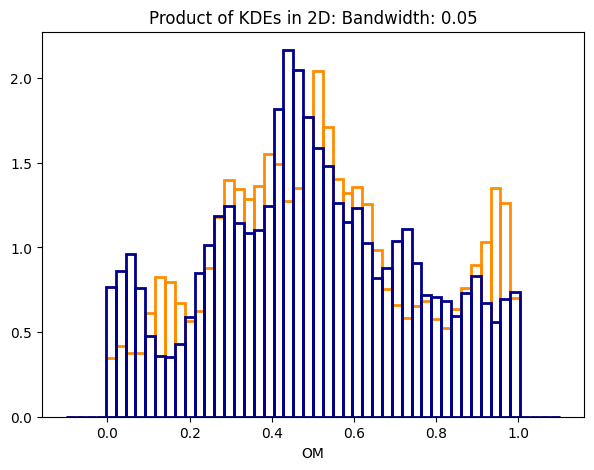

Iteration 1 Params ['OM', 'alpha_weights_1']


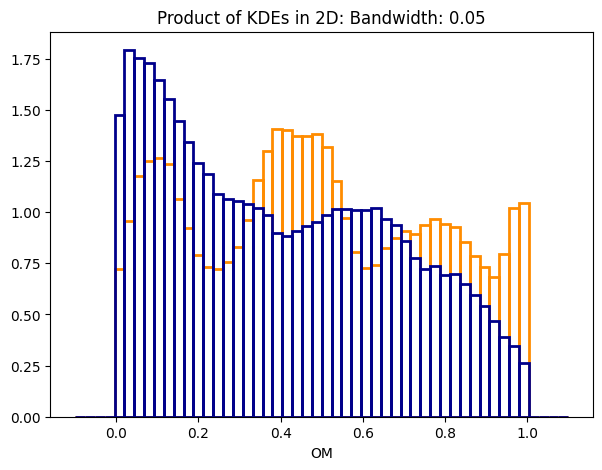

Iteration 2 Params ['OM', 's_c']


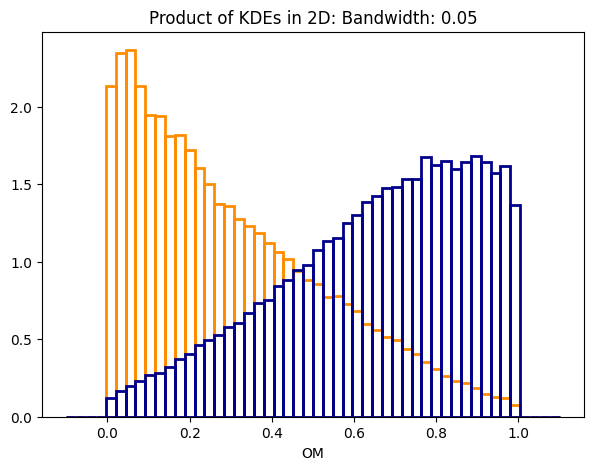

[0.2344647352353065, 0.30991795412292833, 0.8510789049961761]

In [5]:
JAX_chains_list_hyp = [pd.read_csv(f'/mnt/extraspace/hollowayp/zBEAMS_data/python3.11-Subbatching_cp_total_{b_i}.out') for b_i in range(2)]
KDE_scaling(JAX_chains_list_hyp,N_dim=16,
            N_sys=len(JAX_chains_list_hyp[0]),N_iterations=3,
            bandwidth=0.05,PCA_bool=True).compare_1D_histogram(plot=True).ratio_list

In [66]:
JAX_chains_list_hyp[0]

,Unnamed: 0,OM,Ode,alpha_mu_0,alpha_mu_1,alpha_mu_2,alpha_scale_0,alpha_scale_1,alpha_scale_2,alpha_weights_0,alpha_weights_1,s_c,s_m,scale_c,scale_m,w,wa
0,0,0.320366,0.622943,0.382957,1.093557,0.265239,0.133451,2.064196,0.598243,0.191587,0.021777,0.742667,-0.369606,0.320884,1.415651,-1.291108,-0.132070
1,1,0.301637,0.644903,0.414958,0.981263,0.327148,0.183125,1.847785,0.552927,0.158469,0.016765,0.720284,-0.305694,0.339343,1.306129,-1.687768,-0.185708
2,2,0.251112,0.640104,0.333487,0.976594,0.330192,0.141453,1.878761,0.537184,0.151295,0.016457,0.718911,-0.341655,0.339316,1.218422,-1.687457,-0.134835
3,3,0.202366,0.662826,0.383837,0.815650,0.329175,0.091754,0.934352,0.501002,0.122278,0.032330,0.744502,-0.488119,0.303936,1.197311,-1.948186,-0.361081
4,4,0.196244,0.651346,0.365795,0.767776,0.317427,0.087406,1.040237,0.487508,0.138117,0.039256,0.762844,-0.543911,0.309100,1.307539,-1.996327,-0.189722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,0.565835,0.439332,0.041736,0.364189,0.961197,1.779452,0.243395,0.248305,0.032143,0.755517,0.898508,-0.893304,0.575697,0.417522,-1.205063,0.654452
399996,399996,0.476078,0.476258,0.051252,0.348195,1.017084,2.146467,0.304802,0.306830,0.035894,0.780012,0.941572,-0.883994,0.637858,0.377421,-1.309596,0.562134
399997,399997,0.408460,0.480290,0.054273,0.356248,0.972823,2.242489,0.329722,0.356389,0.038127,0.792080,0.951245,-0.891058,0.582623,0.473512,-1.464666,0.424033
399998,399998,0.323066,0.513269,0.063331,0.390676,1.128088,2.256521,0.356571,0.299098,0.021654,0.888685,0.918898,-0.890268,0.692882,0.484051,-1.428538,0.615562


In [ ]:
fig,ax = pl.subplots(1,len(JAX_chains_list_hyp),figsize=(5*len(JAX_chains_list_hyp),5))
for b_i in range(len(JAX_chains_list_hyp)):
    ax[b_i].hist(JAX_chains_list_hyp[b_i]['OM'],bins=np.linspace(0,1,51),density=True,alpha=0.5)
pl.show()


In [ ]:
large_dataset = [pd.concat([JAX_chains_list_hyp[0],JAX_chains_list_hyp[1]]).reset_index(drop=True),
                pd.concat([JAX_chains_list_hyp[2],JAX_chains_list_hyp[3]]).reset_index(drop=True)]
KDE_large = KDE_scaling(large_dataset,N_dim=16,
            N_sys=len(large_dataset[0]),N_iterations=1,
            bandwidth=0.2,PCA_bool=True).compare_1D_histogram(plot=True)

Using 10 PCA components, which explain 0.95% of the variance
Using 10 PCA components, which explain 0.95% of the variance
Using 10 PCA components, which explain 0.95% of the variance
Iteration 0 Params ['OM', 'alpha_mu_0', 'alpha_weights_1', 'alpha_weights_0', 'wa', 'alpha_scale_2', 'alpha_mu_1', 'w', 'scale_c', 'Ode', 'scale_m', 'alpha_scale_1', 'alpha_scale_0', 's_m', 's_c', 'alpha_mu_2']


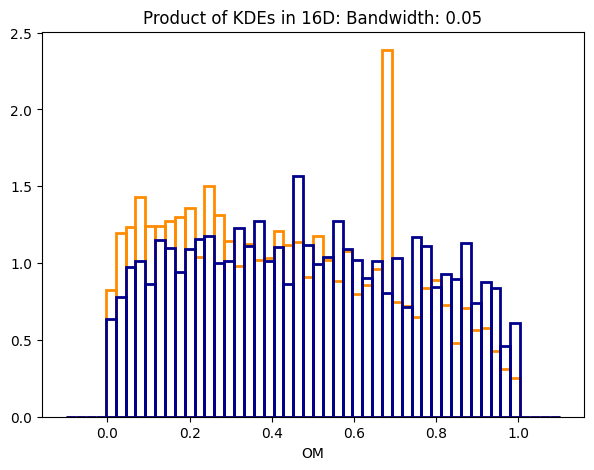

Iteration 1 Params ['OM', 'alpha_mu_2', 'alpha_scale_0', 'scale_m', 'alpha_scale_1', 'alpha_weights_1', 'Ode', 's_c', 'scale_c', 's_m', 'alpha_mu_1', 'w', 'alpha_weights_0', 'alpha_scale_2', 'wa', 'alpha_mu_0']


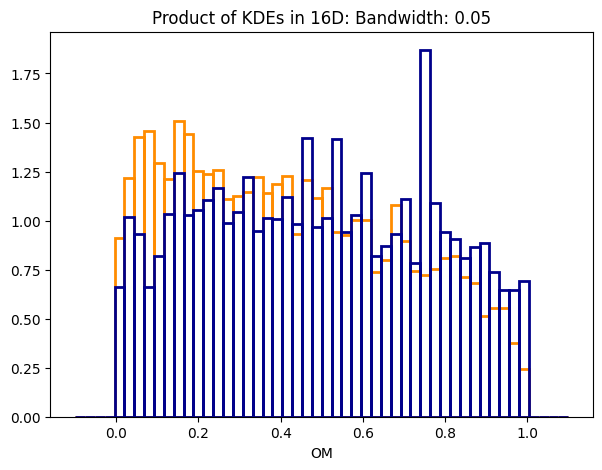

Iteration 2 Params ['OM', 'alpha_scale_1', 'Ode', 'alpha_scale_0', 'alpha_scale_2', 's_m', 'wa', 'alpha_weights_0', 'scale_c', 'alpha_mu_1', 'alpha_weights_1', 'alpha_mu_0', 's_c', 'scale_m', 'alpha_mu_2', 'w']


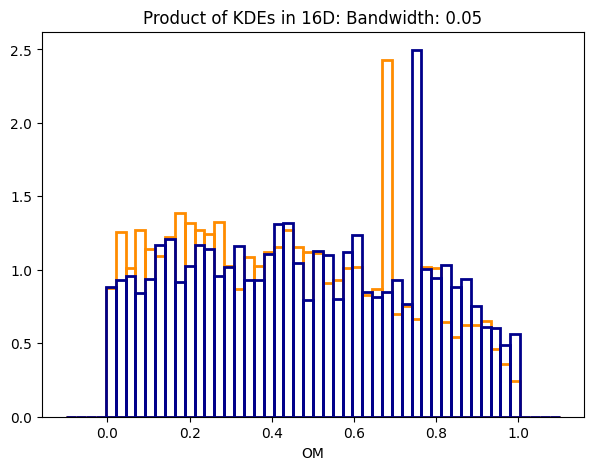

[0.2544514107439305, 0.15439252946853807, 0.1635179756429338]

In [63]:
KDE_scaling(JAX_chains_list_hyp,N_dim=16,
            N_sys=15000,N_iterations=3,
            bandwidth=0.05,PCA_bool=True).compare_1D_histogram(plot=True).ratio_list

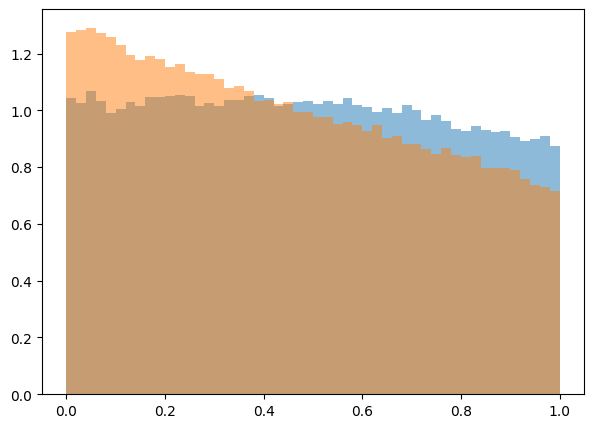

In [8]:
JAX_chains_list_hyp = [pd.read_csv(f'/mnt/extraspace/hollowayp/zBEAMS_data/cmd_outputs/python3.11-Subbatching_cp_total_{b_i}.out') for b_i in range(2)]
fig = pl.figure(figsize=(7,5))
hist_dict = {'bins':np.linspace(0,1,51),'alpha':0.5,'density':True}
pl.hist(JAX_chains_list_hyp[0]['OM'],**hist_dict)
pl.hist(JAX_chains_list_hyp[1]['OM'],**hist_dict)
pl.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)  # Reduce to 10 dimensions (adjust based on data)
X_f_reduced = pca.fit_transform(JAX_chains_list_hyp[0])
print(np.arange(16)[np.where(np.cumsum(pca.explained_variance_ratio_/np.sum(pca.explained_variance_ratio_))>0.99)[0]])
print(np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_)))
pl.plot(pca.explained_variance_/np.sum(pca.explained_variance_))
pl.show()

In [ ]:
print(marker_styles)

In [53]:
def plot_scaling_relation(N_dim,N_sys_list,mean_ratio,mean_ratio_std,bandwidth_list,N_dim_max=3,saveas=None):
    fig = pl.figure(figsize=(7,5))
    pl.title('KDE Scaling',size=18)
    linestyle_list = ['-','--',':','-.','--',':','-.']
    marker_list = ['*','+', 'x','o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P',  'h', 'H', 'X', 'D', 'd', '|', '_']
    color_dict = {elem+1:pl.cm.viridis(np.linspace(0,1,N_dim_max))[elem] for elem in range(N_dim_max)}
    for p_i,key_i in enumerate(mean_ratio_std.keys()):
        N_dim,bandwidth = key_i
        linestyle_i = linestyle_list[np.where(np.array(bandwidth_list)==bandwidth)[0][0]]
        marker_i = marker_list[np.where(np.array(bandwidth_list)==bandwidth)[0][0]]
        if bandwidth==bandwidth_list[0] or N_dim==N_dim_max:
            label_i = f'{N_dim}D,'+' $\sigma_{bw}$'+f':{bandwidth}'
        else: label_i = None
        pl.scatter(N_sys_list[:len(mean_ratio[(N_dim,bandwidth)])],mean_ratio[(N_dim,bandwidth)],
                        # yerr=mean_ratio_std[(N_dim,bandwidth)],
                        # linestyle=linestyle_i,
                        marker = marker_i,
                    c=color_dict[N_dim],label=label_i,
                    # capsize=3, elinewidth=1, markeredgewidth=1
                    )
        pl.plot(N_sys_list[:len(mean_ratio[(N_dim,bandwidth)])],mean_ratio[(N_dim,bandwidth)],
                        # yerr=mean_ratio_std[(N_dim,bandwidth)],
                        linestyle=linestyle_i,
                    c=color_dict[N_dim],label=None,alpha=0.5
                    # capsize=3, elinewidth=1, markeredgewidth=1
                    )
    pl.xlabel('Number of systems',size=15)
    pl.ylabel('Fractional bin difference',size=15)
    fig.legend(fontsize=7,bbox_to_anchor=(1.14,0.5),loc='center right')
    pl.ylim(-0.1,2.1)
    pl.tight_layout()
    if saveas is not None:
        for fmt in ['pdf','png']: pl.savefig(saveas+f'.{fmt}',dpi=500,bbox_inches='tight')
    pl.close()

In [ ]:
X_plot = np.linspace(-2,2,100)
Y_1D = np.exp(KernelDensity().fit([[0]]).score_samples(X_plot.reshape(-1,1)))
Y_2D = np.exp(KernelDensity().fit([[0,0]]).score_samples(np.array([X_plot,np.zeros(len(X_plot))]).T))

pl.plot(X_plot,Y_1D/np.max(Y_1D),label='1D')
pl.plot(X_plot,Y_2D/np.max(Y_2D),'--',label='2D')
pl.ylim(bottom=0)
pl.legend()
pl.show()